# Extraindo dados

In [255]:
from requests import get
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [256]:
try:
  path = "dados/"
  filename = "telecom_clean.json"
  if filename in os.listdir(path):
    dados = pd.read_json(f"{path}{filename}")
  else:
    raise Exception("Arquivo não encontrado")
except:
  data  = get("https://raw.githubusercontent.com/matheus-costa-dev/One-Oracle/refs/heads/main/desafios/challange%20etl%20telecom/telecom_clean.json").json()
  dados = pd.DataFrame(data)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   int64  
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   int64  
 11  OnlineBackup      7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  TechSupport       7032 non-null   int64  
 14  StreamingTV       7032 non-null   int64  
 15  StreamingMovies   7032 non-null   int64  
 16  Contract          7032 non-null   object 
 17  

# análise exploratória

In [257]:
dados.shape

(7032, 22)

In [258]:
dados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [259]:
dados.describe(include=["object"])

,customerID,gender,InternetService,Contract,PaymentMethod
count,7032,7032,7032,7032,7032
unique,7032,2,3,3,4
top,9995-HOTOH,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3549,3096,3875,2365


In [260]:
dados["Churn"].value_counts(normalize = True)

,proportion
Churn,
0,0.734215
1,0.265785


há um desbalanceamento nos dados, terei que usar metodos de balanceamento como oversample ou undersample de modo a tornar o modelo mais efetivo

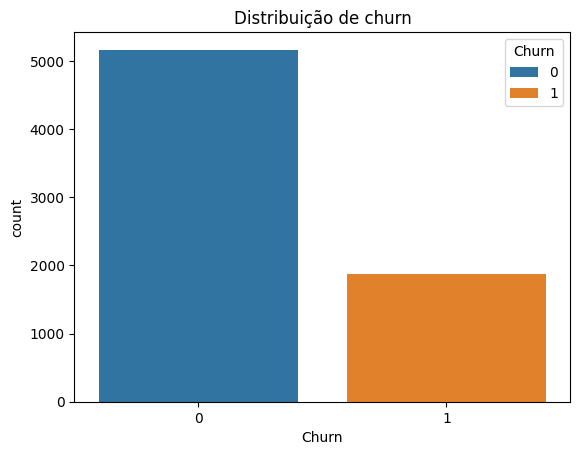

In [261]:
sns.countplot(data=dados, x="Churn", hue="Churn")
plt.title("Distribuição de churn")
plt.show()

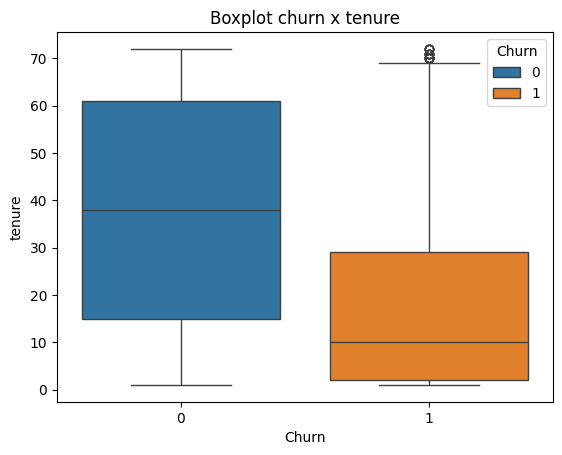

In [262]:
sns.boxplot(data=dados, x="Churn", y="tenure", hue="Churn")
plt.title("Boxplot churn x tenure")
plt.show()

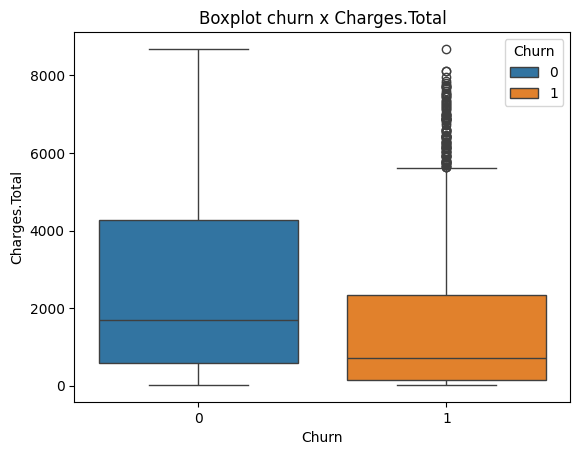

In [263]:
sns.boxplot(data=dados, x="Churn", y="Charges.Total", hue="Churn")
plt.title("Boxplot churn x Charges.Total")
plt.show()

# Analise de correlação

In [264]:
dados.corr(numeric_only=True)["Churn"].sort_values(ascending = False)

,Churn
Churn,1.000000
Charges.Monthly,0.192858
Charges.Daily,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
StreamingTV,0.063254
StreamingMovies,0.060860
MultipleLines,0.040033
PhoneService,0.011691
DeviceProtection,-0.066193


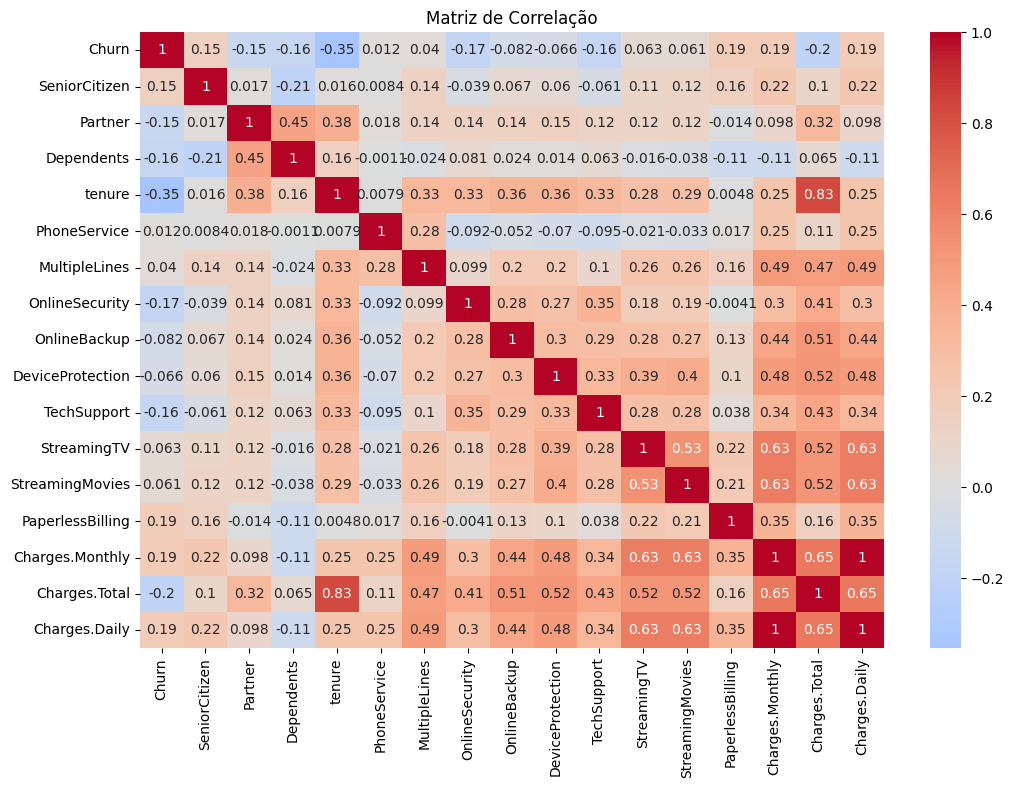

In [265]:
plt.figure(figsize=(12, 8))
sns.heatmap(dados.corr(numeric_only=True), annot = True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

# Remoção de colunas irrelevantes

In [266]:
dados.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


In [267]:
dados_clean = dados.drop(columns = ["customerID", "PaperlessBilling", "Charges.Daily"])

In [268]:
x = dados_clean.drop(columns = ["Churn"])
y = dados_clean["Churn"]

x_colunas = x.columns

In [269]:
var_categoricas = ["gender", "InternetService", "Contract", "PaymentMethod"]

# Encoding

In [270]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

one_hot = make_column_transformer(
    (OneHotEncoder(drop= "if_binary"),
     var_categoricas
     ),
    remainder = "passthrough",
    sparse_threshold = 0
)

x = one_hot.fit_transform(x)

# Separação dados de treino e teste

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,  stratify=y, test_size = 0.3, random_state = 42)

# Avaliando modelos de classificação

In [273]:
def get_best_depth(model ,max_i:int) -> pd.DataFrame:
  resultado_score = []

  for i in range(1, max_i):
    model_instance = model(max_depth=i, random_state = 5)
    model_instance.fit(x_treino, y_treino)
    score = model_instance.score(x_teste, y_teste)
    resultado_score.append(score)

  df = pd.DataFrame(resultado_score, index=range(1, max_i), columns=["score"]) \
  .sort_values(by="score", ascending=False)

  return df

def get_best_n_neighbors(model, max_i:int) -> pd.DataFrame:
  resultado_score = []
  for i in range(1,max_i):
    knn = model(n_neighbors=i)
    knn.fit(x_treino_normalizado, y_treino)
    score = knn.score(x_teste_normalizado, y_teste)
    resultado_score.append(score)

  df = pd.DataFrame(resultado_score, index=range(1, max_i), columns=["score"]) \
  .sort_values(by="score", ascending=False)

  return df

## Dummy

In [274]:
from sklearn.dummy import DummyClassifier

In [275]:
dummy = DummyClassifier(random_state =5)
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.7341232227488151

## arvore de decisão

In [276]:
from sklearn.tree import DecisionTreeClassifier

In [277]:
get_best_depth(DecisionTreeClassifier, 15)

,score
5,0.788626
3,0.788626
6,0.776303
7,0.775829
4,0.772512
8,0.768246
9,0.762559
10,0.753555
2,0.750711
11,0.748815


## RandomForest

In [278]:
from sklearn.ensemble import RandomForestClassifier

In [279]:
rf = RandomForestClassifier(random_state = 5)
rf.fit(x_treino, y_treino)
rf.score(x_teste, y_teste)


0.7796208530805687

In [280]:
get_best_depth(RandomForestClassifier, 15)

,score
8,0.795261
7,0.794313
9,0.793365
5,0.792891
10,0.791943
6,0.790995
3,0.788626
4,0.788152
11,0.786730
12,0.786256


## knn

In [281]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [282]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)
x_teste_normalizado = normalizacao.transform(x_teste)

In [283]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino)
knn.score(x_teste_normalizado, y_teste)

0.752132701421801

In [284]:
get_best_n_neighbors(KNeighborsClassifier, 15)

,score
12,0.772512
10,0.770616
14,0.770616
13,0.769194
7,0.765877
11,0.763981
6,0.763507
8,0.763033
4,0.761611
9,0.761137


## Logistic

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [286]:
scaler = StandardScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)


In [287]:
lr = LogisticRegression(random_state = 5)
lr.fit(x_treino_normalizado, y_treino)
lr.score(x_teste_normalizado, y_teste)

0.7990521327014218

# Resultado do melhor modelo

O melhor modelo até então foi o Logistic Regression, sendo o score geral igual = 0.7990521327014218

# Balanceando os dados para o melhor modelo

In [288]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline

## oversample

In [289]:
smote = SMOTE()
x_treino_resample, y_treino_resample = smote.fit_resample(x_treino, y_treino)

In [290]:
display(y_treino.value_counts())
display(y_treino_resample.value_counts())

,count
Churn,
0,3614
1,1308


,count
Churn,
1,3614
0,3614


In [291]:
imb_pipeline_over = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("smote", SMOTE()),
    ("logistic_regression", LogisticRegression(random_state = 5))
])

imb_pipeline_over.fit(x_treino, y_treino)
imb_pipeline_over.score(x_teste, y_teste)

0.7426540284360189

## undersample

In [292]:
imb_pipeline_under = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("nearmiss", NearMiss(version=3)),
    ("logistic_regression", LogisticRegression(random_state = 5))
])

imb_pipeline_under.fit(x_treino, y_treino)
imb_pipeline_under.score(x_teste, y_teste)

0.7635071090047393

## comparando resultados com o classification report

In [293]:
from sklearn.metrics import classification_report

### Sem balancemanto

In [294]:
y_pred = lr.predict(x_teste)
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.02      0.03      1549
           1       0.26      0.97      0.41       561

    accuracy                           0.27      2110
   macro avg       0.45      0.49      0.22      2110
weighted avg       0.53      0.27      0.14      2110



### over

In [295]:
y_pred = imb_pipeline_over.predict(x_teste)
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110



### under

In [296]:
y_pred = imb_pipeline_under.predict(x_teste)
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1549
           1       0.54      0.68      0.60       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.76      0.77      2110



No primeiro caso (sem balanceamento), embora o recall da classe 1 seja altíssimo (0.97), a precisão dessa mesma classe é muito baixa (0.26), o que gera um f1-score baixo (0.41) — indicando que o modelo está praticamente "chutando" muitos positivos e errando bastante (muitos falsos positivos).

Já no caso com balanceamento Over, o f1-score da classe 1 sobe para 0.63, com um bom equilíbrio entre precisão (0.51) e recall (0.80). Isso mostra um modelo mais robusto e menos enviesado para a classe majoritária.

O f1-score é uma métrica mais confiável para problemas desbalanceados, porque pondera a precisão e o recall, trazendo um equilíbrio entre eles.

Então, apesar do recall alto sem balanceamento, o modelo com oversampling tem uma performance global melhor e é mais indicado para uso prático.

# Matriz de confusão do melhor modelo

In [297]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

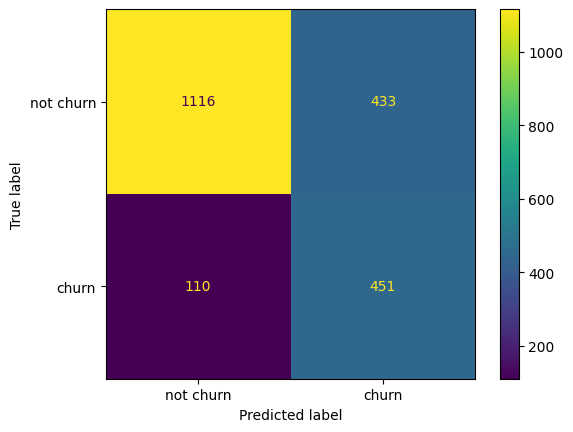

In [298]:
y_pred = imb_pipeline_over.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_pred)
ConfusionMatrixDisplay(matriz_confusao, display_labels=["not churn", "churn"]).plot()

In [299]:
x_colunas

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [300]:
df_feature_importance  = pd.DataFrame({'Feature': one_hot.get_feature_names_out(x_colunas), 'Coefficient':imb_pipeline_over["logistic_regression"].coef_[0]}) \
.sort_values(by="Coefficient", ascending=False)
df_feature_importance["Feature"] = df_feature_importance["Feature"].str.replace(".*__","",regex=True)
df_feature_importance.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
24,Charges.Total,0.981136
2,InternetService_Fiber optic,0.640760
4,Contract_Month-to-month,0.311286
21,StreamingTV,0.256164
22,StreamingMovies,0.206425
9,PaymentMethod_Electronic check,0.136064
16,MultipleLines,0.126758
11,SeniorCitizen,0.099044
19,DeviceProtection,0.045803
15,PhoneService,0.037221


# Fazendo a saida em arquivo pickel do modelo

In [301]:
import pickle

In [302]:
with open("modelo_logistic_regression.pkl", "wb") as f:
  f.write(pickle.dumps(imb_pipeline_over))

# Relatório Final: Análise de Evasão de Clientes e Modelagem Preditiva

## 1. Introdução

O presente relatório tem como objetivo analisar os fatores que influenciam a evasão de clientes (churn) e avaliar o desempenho de diferentes modelos de classificação para prever essa evasão. A análise foi realizada com base em um conjunto de dados contendo informações relevantes dos clientes, e o modelo escolhido visa apoiar decisões estratégicas para retenção.
Esse projeto é uma continuação do [challange telecom part 1](https://github.com/matheus-costa-dev/One-Oracle/tree/main/desafios/challange%20etl%20telecom) o qual foi feito o tratamento de dados e análise que foi usado neste.

## 2. Metodologia

Pré-processamento: Foram selecionadas variáveis relevantes com base em análises estatísticas e de correlação para maximizar o poder explicativo.

Modelos testados: Foram testados os seguintes modelos DummyRegressor, DecisionTree, RandomForest, K Neighbors Nearest e Logistic Regression.

O Modelo com a melhor foi o Logistic Regression com aproximadamente 79,9% de acurácia geral, portanto foi feito ele sem balanceamento, com oversample e undersample e comparados os resultados obtidos.

Métricas de avaliação: Precisão, Recall, F1-score e Acurácia, com ênfase no F1-score para melhor balancear falsos positivos e falsos negativos, considerando o desbalanceamento da base.

## 3. Resultados e Avaliação dos Modelos

Modelo	Acurácia	Precisão (classe 1)	Recall (classe 1)	F1-score (classe 1)
Logistic Regression (sem bal.)	27%	0.26	0.97	0.41
Logistic Regression (oversampling)	75%	0.51	0.80	0.63
Logistic Regression (undersampling)	76%	0.54	0.68	0.60

O modelo sem balanceamento apresenta um recall muito alto, porém com baixa precisão e baixo F1-score, indicando muitos falsos positivos.

Os modelos com balanceamento (oversampling e undersampling) melhoraram significativamente o desempenho, com F1-scores mais equilibrados e melhores taxas gerais de acerto.

Entre os modelos balanceados, o oversampling apresentou um melhor recall, importante para capturar a maior parte dos clientes propensos a evadir, minimizando perdas.

## 4. Fatores Principais que Influenciam a Evasão

Pelo modelo de regressão logística, as variáveis com maior influência positiva na evasão (coeficiente positivo mais alto) são:

Charges.Total (1.00): Clientes com maior gasto total têm maior probabilidade de evasão.

InternetService_Fiber optic (0.56): Usuários de fibra óptica apresentam maior risco de churn.

Contract_Month-to-month (0.32): Contratos mensais aumentam a chance de evasão.

StreamingTV (0.18) e StreamingMovies (0.18): Uso desses serviços está associado a maior churn.

PaymentMethod_Electronic check (0.15): Clientes que pagam por cheque eletrônico têm mais risco.

## 5. Fatores Principais que protegem contra a Evasão

Já as variáveis com efeito protetor (coeficiente negativo mais alto), associadas a menor evasão, incluem:

tenure (-1.68): Clientes com maior tempo de permanência tendem a permanecer mais.

InternetService_No (-0.59): Clientes sem serviço de internet têm menor risco (provavelmente porque não usam o serviço principal).

Charges.Monthly (-0.59): Contrariamente ao gasto total, altos valores mensais estão associados a menor evasão (possivelmente clientes estáveis).

Contract_Two year (-0.31): Contratos de dois anos são importantes para retenção.

TechSupport (-0.18) e OnlineSecurity (-0.11): Serviços adicionais de suporte e segurança reduzem o churn.

## 6. Estratégias de Retenção Propostas

Com base na análise dos coeficientes do modelo de regressão logística, podemos identificar os principais fatores que aumentam o risco de evasão e aqueles que contribuem para a retenção. A seguir, são apresentadas estratégias específicas para mitigar a evasão e fortalecer o relacionamento com os clientes:

### 6.1. Foco em Clientes com Contratos Mensais

Desafio: Clientes com contratos mês a mês têm maior probabilidade de evasão.

Estratégia:

Incentivar a migração para contratos mais longos (anual ou bienal) por meio de descontos e benefícios exclusivos.

Oferecer planos personalizados que aumentem a percepção de valor e fidelidade.

### 6.2. Monitoramento dos Clientes com Gastos Elevados (Charges.Total)

Desafio: Clientes com maior gasto total têm maior risco de evasão, possivelmente por insatisfação ou custo percebido alto.

Estratégia:

Implementar programas VIP ou de fidelidade com vantagens especiais para esses clientes.

Realizar pesquisas de satisfação para identificar pontos de insatisfação e agir preventivamente.

Oferecer revisões periódicas dos planos para garantir alinhamento custo-benefício.

### 6.3. Atenção aos Usuários de Internet Fibra Óptica e Serviços de Streaming

Desafio: Usuários de fibra óptica e consumidores de serviços como StreamingTV e StreamingMovies apresentam maior churn.

Estratégia:

Melhorar a qualidade técnica e suporte para esses serviços, garantindo estabilidade e atendimento rápido.

Criar pacotes integrados com benefícios para quem utiliza múltiplos serviços, incentivando o uso contínuo.

Oferecer conteúdos exclusivos e promoções para assinantes desses serviços.

### 6.4. Incentivo a Métodos de Pagamento Estáveis

Desafio: Clientes que usam cheque eletrônico apresentam maior evasão.

Estratégia:

Incentivar métodos de pagamento automáticos, como cartão de crédito ou débito automático, facilitando o processo e reduzindo inadimplência.

Oferecer descontos ou vantagens para pagamentos via métodos automáticos.

### 6.5. Valorização da Permanência (Tenure)

Oportunidade: Clientes com maior tempo de relacionamento são mais leais.

Estratégia:

Premiar a fidelidade com bônus progressivos, descontos e conteúdos exclusivos conforme o tempo de contrato.

Comunicar regularmente os benefícios de continuar o relacionamento com a empresa.

### 6.6. Fortalecimento dos Serviços de Suporte e Segurança

Oportunidade: Serviços como TechSupport e OnlineSecurity reduzem a evasão.

Estratégia:

Investir em treinamentos da equipe de atendimento para melhorar a experiência do cliente.

Ampliar a oferta e a comunicação sobre serviços adicionais de segurança e suporte técnico.

Criar canais de atendimento ágeis e personalizados, com foco em resolução rápida.

Essas estratégias integradas, alinhadas com os dados e o modelo preditivo, têm potencial para reduzir significativamente a evasão, melhorar a satisfação do cliente e fortalecer a base ativa da empresa.

## 7. Considerações Finais

A análise conduzida utilizando o modelo de regressão logística, aliado a técnicas de balanceamento de dados, permitiu identificar com clareza os principais fatores que influenciam a evasão dos clientes. O modelo balanceado por oversampling mostrou-se mais eficaz, equilibrando adequadamente precisão e recall, e fornecendo uma base sólida para ações estratégicas.

Os coeficientes do modelo evidenciam que variáveis como tempo de relacionamento (tenure), tipo de contrato, métodos de pagamento, bem como o uso de serviços específicos como internet fibra óptica e streaming, impactam diretamente o comportamento de churn. Além disso, a presença de serviços adicionais como suporte técnico e segurança online atua como um importante fator de retenção.

Compreender esses aspectos possibilita a elaboração de estratégias direcionadas, que podem reduzir a taxa de evasão e aumentar a satisfação e fidelização dos clientes. Investir em contratos de longo prazo, programas de fidelidade, melhorias nos serviços oferecidos e no atendimento ao cliente são caminhos essenciais para consolidar uma base sólida e sustentável.

Por fim, destaca-se a importância da continuidade no monitoramento e atualização dos modelos preditivos, assim como a incorporação constante do feedback dos clientes, garantindo que as ações sejam cada vez mais alinhadas às necessidades reais do mercado e ao comportamento dos consumidores.